In [30]:
import os 
import cv2
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf 
from keras import models
from keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img

In [3]:
directory= 'dataset/'
print(os.listdir(directory))

['Closed_Eyes', 'Open_Eyes']


In [4]:
closed_imgs= os.listdir(directory+'Closed_Eyes/')
opened_imgs= os.listdir(directory+'Open_Eyes/')

In [5]:
print(closed_imgs[:2])
print(opened_imgs[:2])

['s0001_00001_0_0_0_0_0_01.png', 's0001_00002_0_0_0_0_0_01.png']
['s0001_02334_0_0_1_0_0_01.png', 's0001_02336_0_0_1_0_0_01.png']


In [6]:
img= cv2.imread('E:\programs\DL\dataset\Closed_Eyes\s0001_00006_0_0_0_0_0_01.png')
print('Shape of closed eye image :',img.shape)

img= cv2.imread('E:\programs\DL\dataset\Open_Eyes\s0012_07788_0_0_1_1_0_02.png')
print('Shape of opened eye image :',img.shape)

Shape of closed eye image : (81, 81, 3)
Shape of opened eye image : (126, 126, 3)


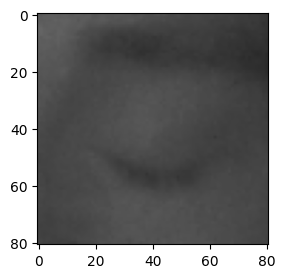

In [7]:
plt.figure(figsize=(3,3))
img= load_img('E:\programs\DL\dataset\Closed_Eyes\s0001_00006_0_0_0_0_0_01.png')
plt.imshow(img)

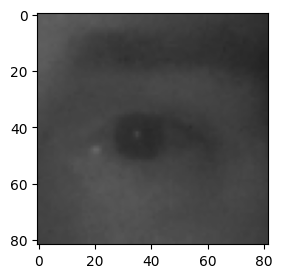

In [8]:
plt.figure(figsize=(3,3))
img= load_img('E:\programs\DL\dataset\Open_Eyes\s0001_02338_0_0_1_0_0_01.png')
plt.imshow(img)

In [9]:
data=[]
labels=[]

In [10]:
INPUT_SIZE=64

for i in opened_imgs:
    img = cv2.imread(directory + 'Open_Eyes/' + i)
    resized_img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    data.append(np.expand_dims(gray_img, axis=-1))
    labels.append(1)

for i in closed_imgs:
    img = cv2.imread(directory + 'Closed_Eyes/' + i)
    resized_img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    data.append(np.expand_dims(gray_img, axis=-1))
    labels.append(0)

data = np.array(data)
labels = np.array(labels)
data = data / 255.0

<Axes: ylabel='count'>

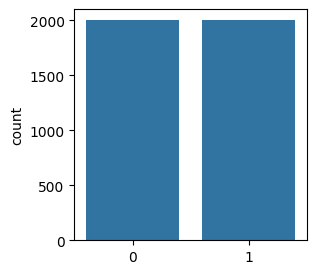

In [11]:
plt.figure(figsize=(3, 3))
sns.countplot(x=labels)

In [12]:
data.shape

(4000, 64, 64, 1)

In [13]:
print(data[0])
print(data[-1])

[[[0.14901961]
  [0.16470588]
  [0.18039216]
  ...
  [0.34509804]
  [0.35294118]
  [0.35294118]]

 [[0.14509804]
  [0.16470588]
  [0.18039216]
  ...
  [0.35686275]
  [0.35686275]
  [0.35294118]]

 [[0.14509804]
  [0.16862745]
  [0.18039216]
  ...
  [0.36862745]
  [0.36078431]
  [0.35686275]]

 ...

 [[0.18823529]
  [0.20392157]
  [0.22352941]
  ...
  [0.27843137]
  [0.28235294]
  [0.29019608]]

 [[0.18823529]
  [0.2       ]
  [0.21568627]
  ...
  [0.2745098 ]
  [0.2745098 ]
  [0.28627451]]

 [[0.19215686]
  [0.2       ]
  [0.21960784]
  ...
  [0.2745098 ]
  [0.2745098 ]
  [0.27843137]]]
[[[0.39607843]
  [0.4       ]
  [0.39607843]
  ...
  [0.18823529]
  [0.18431373]
  [0.16862745]]

 [[0.4       ]
  [0.40392157]
  [0.39215686]
  ...
  [0.18431373]
  [0.17647059]
  [0.17254902]]

 [[0.4       ]
  [0.40392157]
  [0.4       ]
  ...
  [0.18039216]
  [0.16862745]
  [0.16862745]]

 ...

 [[0.28627451]
  [0.2745098 ]
  [0.2745098 ]
  ...
  [0.25490196]
  [0.24313725]
  [0.23137255]]

 [[0.290

In [14]:
print(labels[0])
print(labels[-1])

1
0


In [15]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.33)

In [16]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,437 (9.49 MB)

 Trainable params: 2,485,565 (9.48 MB)

 Non-trainable params: 872 (3.41 KB)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
callback = ModelCheckpoint(
    filepath='DrowzyDetectionModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)
model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=32, callbacks=[callback])

Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9153 - loss: 0.2224
Epoch 1: val_loss improved from inf to 1.31562, saving model to DrowzyDetectionModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.9159 - loss: 0.2209 - val_accuracy: 0.4795 - val_loss: 1.3156
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9856 - loss: 0.0495
Epoch 2: val_loss improved from 1.31562 to 0.98614, saving model to DrowzyDetectionModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.9857 - loss: 0.0493 - val_accuracy: 0.4795 - val_loss: 0.9861
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9911 - loss: 0.0284
Epoch 3: val_loss did not improve from 0.98614
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.4795 - val_loss: 1.2939
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9922 - loss: 0.0179
Epoch 4: val_loss improved from 0.98614 to 0.87086, saving model to D

In [22]:
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9976 - loss: 0.0125


[0.01297721453011036, 0.9969696998596191]

In [24]:
model = models.load_model('DrowzyDetectionModel.keras')  
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9981 - loss: 0.0115


[0.011348865926265717, 0.9977272748947144]

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


Text(0.5, -7.277777777777782, 'Actual')

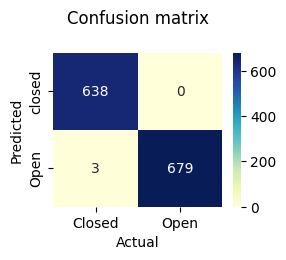

In [27]:
plt.figure(figsize=(6, 2))
preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [28]:
def predict_eye_state(image_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    processed_img = np.expand_dims(gray_img, axis=-1) / 255.0
    processed_img = np.expand_dims(processed_img, axis=0)  

    prediction = model.predict(processed_img)
    if prediction > 0.5:
        return "Open Eyes"
    else:
        return "Closed Eyes"

image_path = 'E:\programs\DL\dataset\Open_Eyes\s0001_02358_0_0_1_0_0_01.png'
prediction = predict_eye_state(image_path)
print("Predicted Eye state:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Eye state: Open Eyes


In [29]:
def predict_eye_state(image_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    processed_img = np.expand_dims(gray_img, axis=-1) / 255.0
    processed_img = np.expand_dims(processed_img, axis=0)  

    prediction = model.predict(processed_img)
    if prediction > 0.5:
        return "Open Eyes"
    else:
        return "Closed Eyes"

image_path = 'E:\programs\DL\dataset\Closed_Eyes\s0037_00237_1_0_0_0_1_01.png'
prediction = predict_eye_state(image_path)
print("Predicted Eye state:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Eye state: Closed Eyes
